### Import

In [ ]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression


In [6]:
# set working directory
os.chdir('C:\\Users\\kevin\\OneDrive\\Documents\\GitHub\\python\\week9labs\\data')  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\kevin\\OneDrive\\Documents\\GitHub\\python\\week9labs\\data'

### Load Data

In [8]:
ect_data = pd.read_csv('ect_data.txt', delimiter='\t')

### Build Models

In [15]:
# load ect data
ect_data = pd.read_csv('ect_data.txt', delimiter='\t')

# quick inspect
ect_data.info()
ect_data.head()

# build regression model using formula syntax
model = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + satis01 + peruse04', data=ect_data).fit()

# output regression summary
print(model.summary())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB
                            OLS Regression Results                            
Dep. Variable:             intent1_01 

<Axes: xlabel='fittedvalues', ylabel='residuals'>

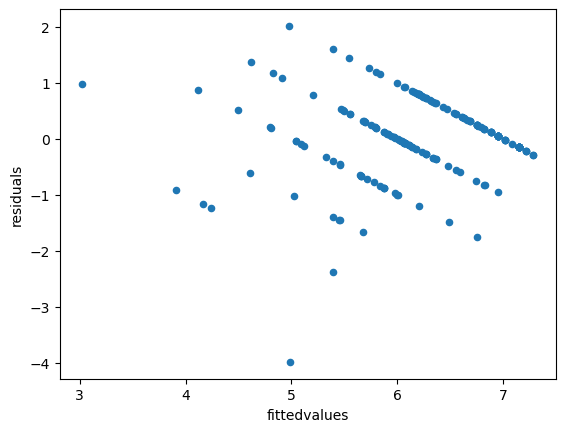

In [21]:
# add fitted values and residuals to the DataFrame
ect_data['fittedvalues'] = model.fittedvalues
ect_data['residuals'] = model.resid

# now plot using column names
ect_data.plot.scatter(x='fittedvalues', y='residuals')


The residuals vs fitted plot shows a slight pattern, suggesting a potential minor violation of linearity. Residuals are not perfectly randomly scattered. However, the deviation is not extreme, so the linear model is still acceptable for this analysis

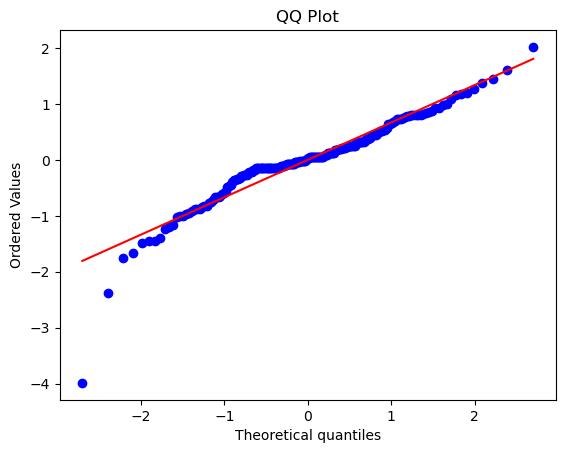

In [23]:
sts.probplot(model.resid, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

In [ ]:
The QQ plot shows that the residuals mostly follow a straight line, suggesting approximate normality. Some minor deviations are visible at the tails, but overall, the assumption of normality is reasonably satisfied.

intent1_01 = 0.9839 + 0.3191(attitude1_01) + 0.1623(attitude1_02) + 0.2683(peruse01) + 0.1978(satis01) - 0.0666(peruse04)


Based on the t-tests, the variables attitude1_01 and satis01 were chosen because they had statistically significant p-values less than 0.05. Their t-values (3.358 and 3.544, respectively) also indicate strong contributions to the prediction of intent1_01. Thus, these two variables were selected for further interpretation.